In [1]:
import numpy as np
import pandas as pd
import plotly.express as plx
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import missingno as  msno
import os

In [2]:
data=pd.read_csv('social_media_data.csv')

In [3]:
data.head()


,date,platform,post_type,likes,shares,comments,views
0,2023-05-24,Twitter,image,868.0,238.0,352.0,8836.0
1,2023-02-23,Twitter,image,944.0,610.0,146.0,5554.0
2,2023-03-18,Instagram,image,1067.0,858.0,365.0,4018.0
3,2023-06-12,Twitter,text,780.0,427.0,100.0,6999.0
4,2023-02-03,Instagram,text,836.0,893.0,443.0,5802.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2000 non-null   object 
 1   platform   2000 non-null   object 
 2   post_type  2000 non-null   object 
 3   likes      1992 non-null   float64
 4   shares     1992 non-null   float64
 5   comments   1992 non-null   float64
 6   views      1990 non-null   float64
dtypes: float64(4), object(3)
memory usage: 109.5+ KB


In [5]:
data.describe()

,likes,shares,comments,views
count,1992.000000,1992.000000,1992.000000,1990.000000
mean,1289.795181,497.286647,305.847892,6966.834673
std,525.123426,229.809511,114.761598,1724.795879
min,400.000000,100.000000,100.000000,4000.000000
25%,820.000000,300.000000,206.000000,5507.000000
50%,1292.000000,491.000000,310.500000,6947.000000
75%,1753.250000,688.000000,407.000000,8398.250000
max,2200.000000,900.000000,500.000000,9998.000000


In [6]:
data.isna().any()

date         False
platform     False
post_type    False
likes         True
shares        True
comments      True
views         True
dtype: bool

<Axes: >

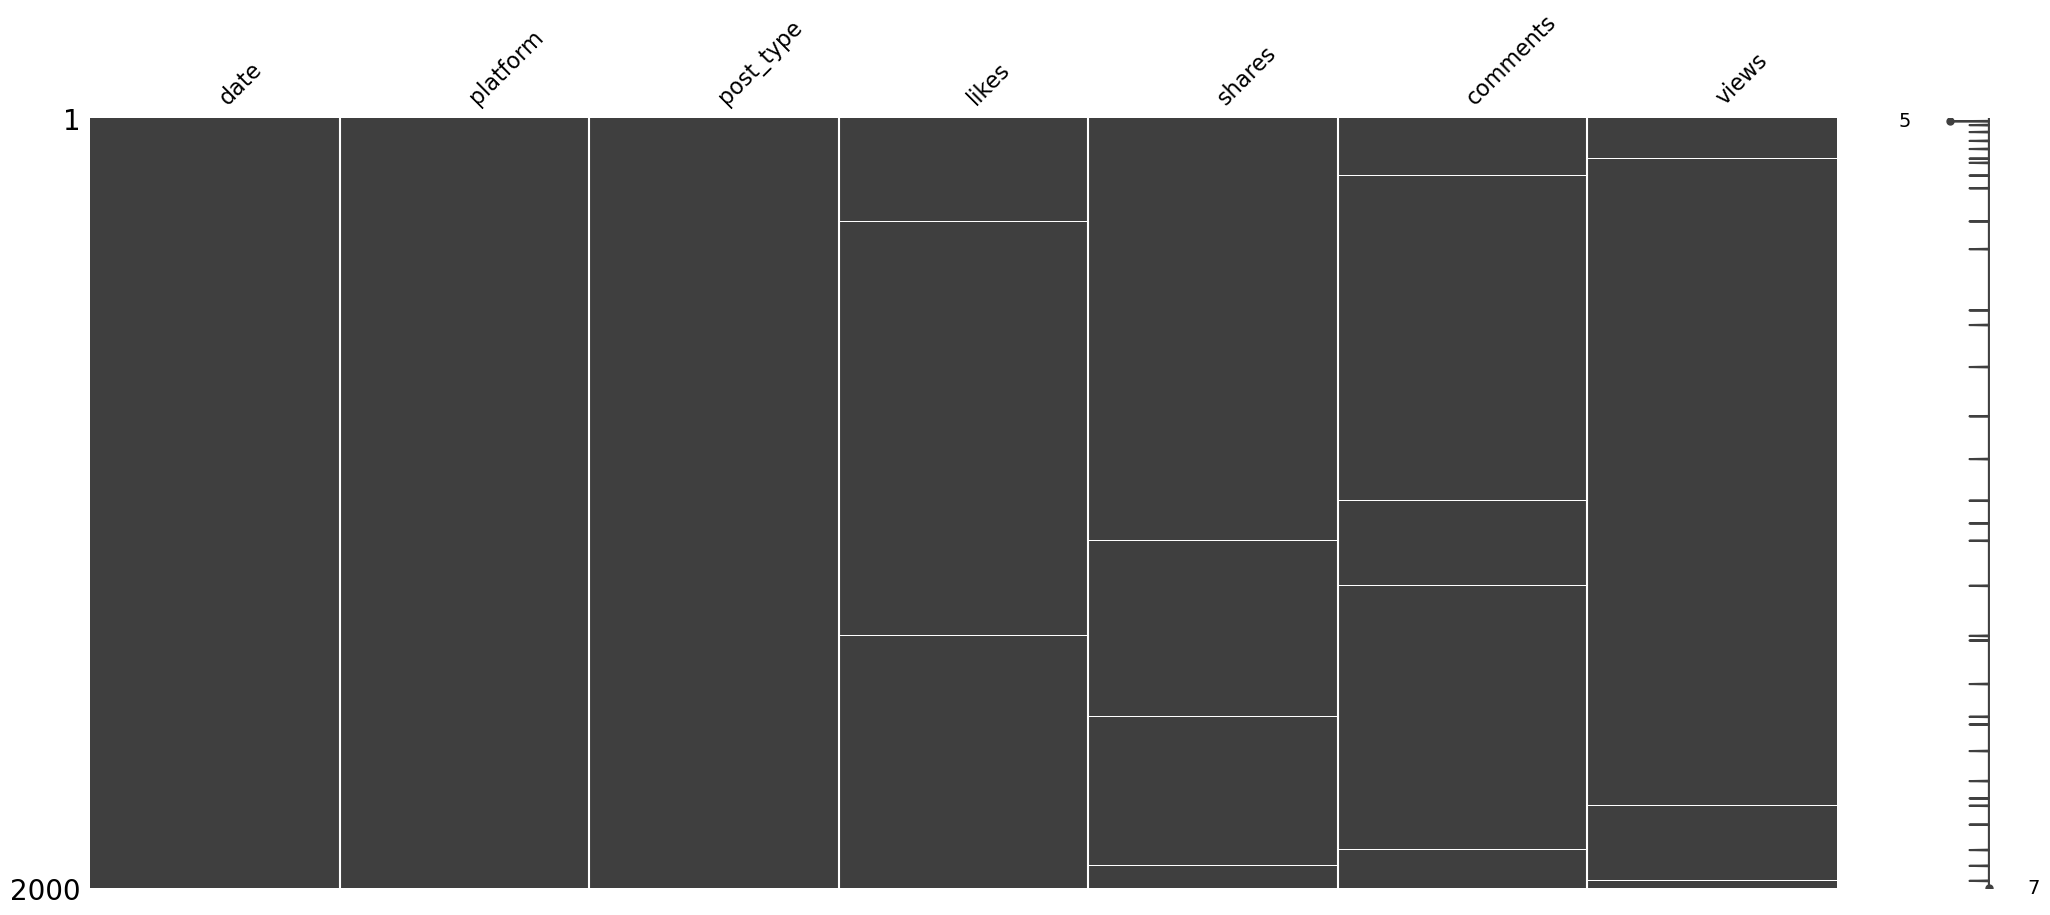

In [7]:
msno.matrix(data)

<Axes: >

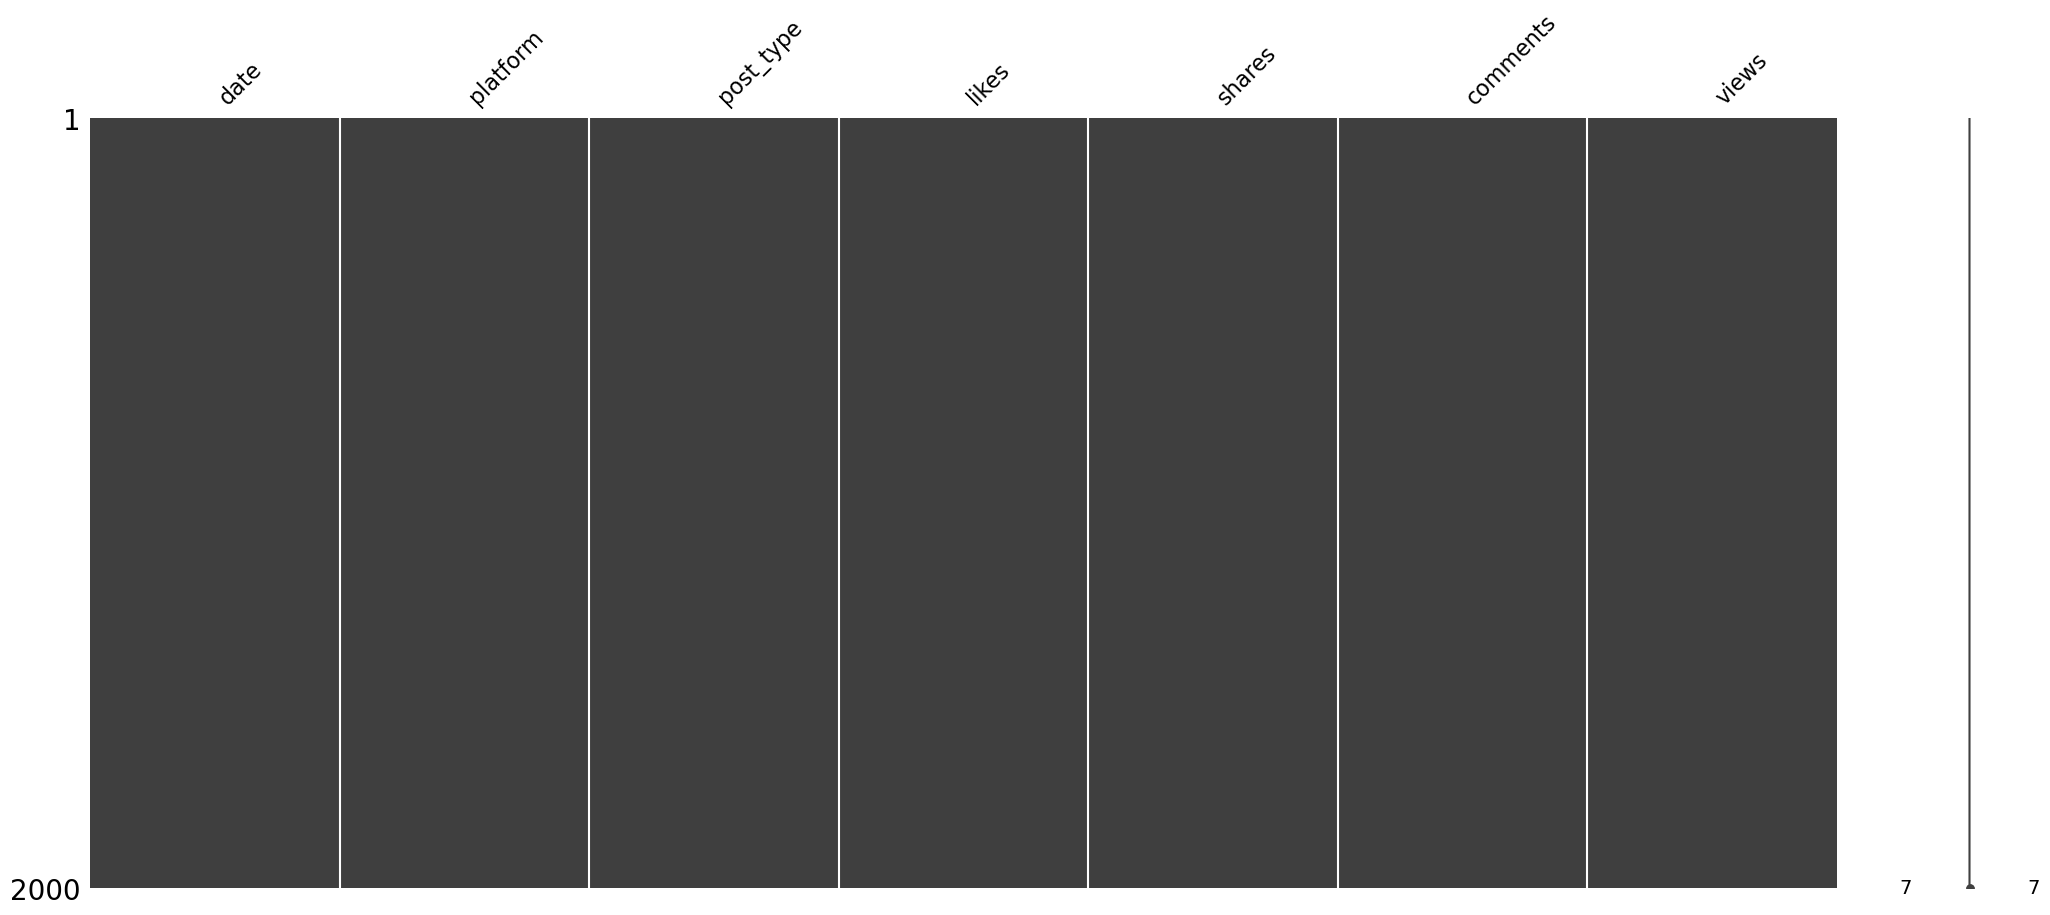

In [8]:
data = data.fillna(value=0)
msno.matrix(data)

In [9]:
duplicate_summary = {col: data[col].duplicated().any() for col in data.columns}
duplicate_summary 


{'date': True,
 'platform': True,
 'post_type': True,
 'likes': True,
 'shares': True,
 'comments': True,
 'views': True}

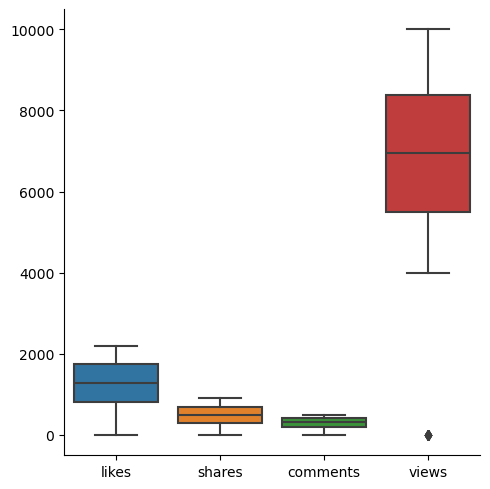

In [10]:
x=sns.catplot( data=data, kind='box')

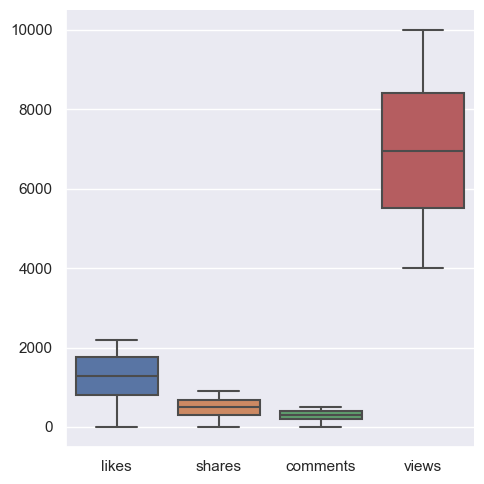

In [11]:
data[['likes', 'shares', 'comments','views']] = data[['likes', 'shares', 'comments','views']].astype(float)

# Set the figure size
sns.set(rc={'figure.figsize': (10, 8)})

# Calculate and set the whiskers to remove outliers
Q1 = data[['likes', 'shares', 'comments','views']].quantile(0.25)
Q3 = data[['likes', 'shares', 'comments','views']].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_data = data[
    (data['likes'] >= lower_bound['likes']) & (data['likes'] <= upper_bound['likes']) &
    (data['shares'] >= lower_bound['shares']) & (data['shares'] <= upper_bound['shares']) &
    (data['comments'] >= lower_bound['comments']) & (data['comments'] <= upper_bound['comments'])&
    (data['views'] >= lower_bound['views']) & (data['views'] <= upper_bound['views'])
]
data=filtered_data
# Create a boxplot using catplot with kind='box'
x = sns.catplot(data=filtered_data, kind='box')

# Show the plot
plt.show()

In [15]:
data.groupby(by='date')[data.columns[3:]].agg('sum').reset_index()

,date,likes,shares,comments,views
0,2022-10-13,665.0,690.0,232.0,6796.0
1,2022-10-14,7161.0,2764.0,2151.0,47446.0
2,2022-10-15,10366.0,3824.0,1159.0,35933.0
3,2022-10-16,6174.0,3151.0,2091.0,45563.0
4,2022-10-17,11775.0,4008.0,2467.0,61535.0
...,...,...,...,...,...
360,2023-10-09,3845.0,1661.0,1007.0,33992.0
361,2023-10-10,13050.0,4928.0,2967.0,70311.0
362,2023-10-11,10100.0,3232.0,1625.0,54805.0
363,2023-10-12,8295.0,2874.0,2067.0,42428.0


<Figure size 1200x800 with 0 Axes>

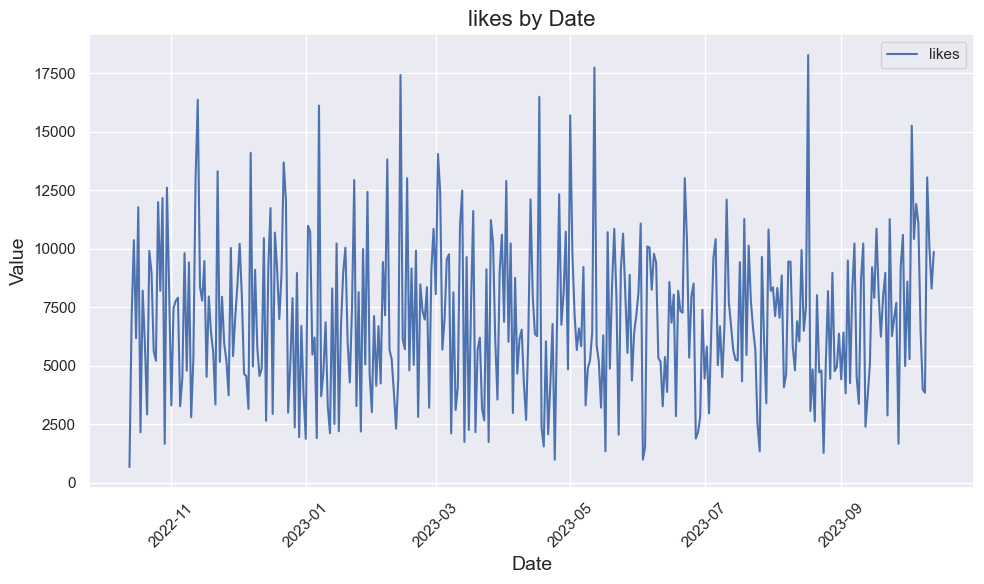

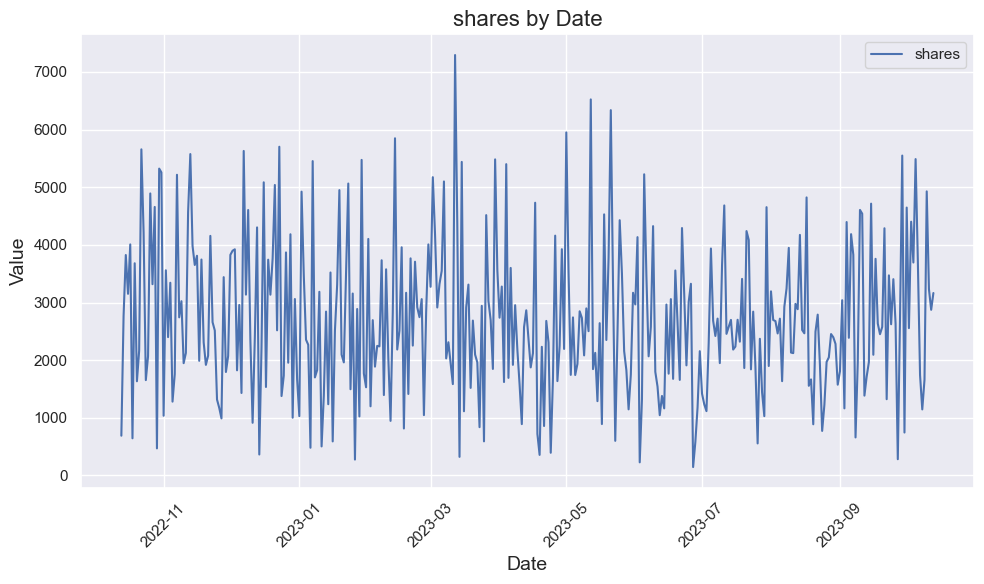

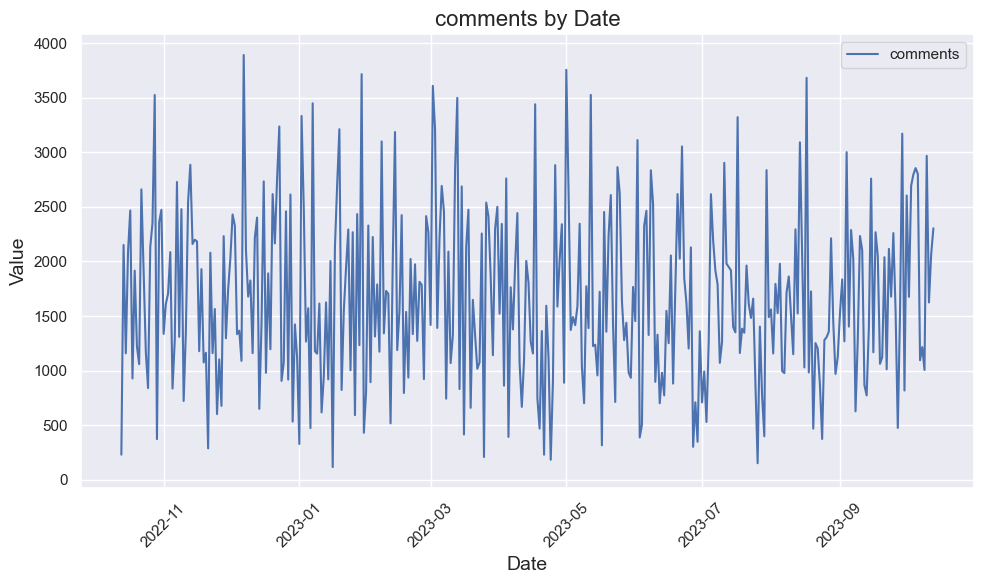

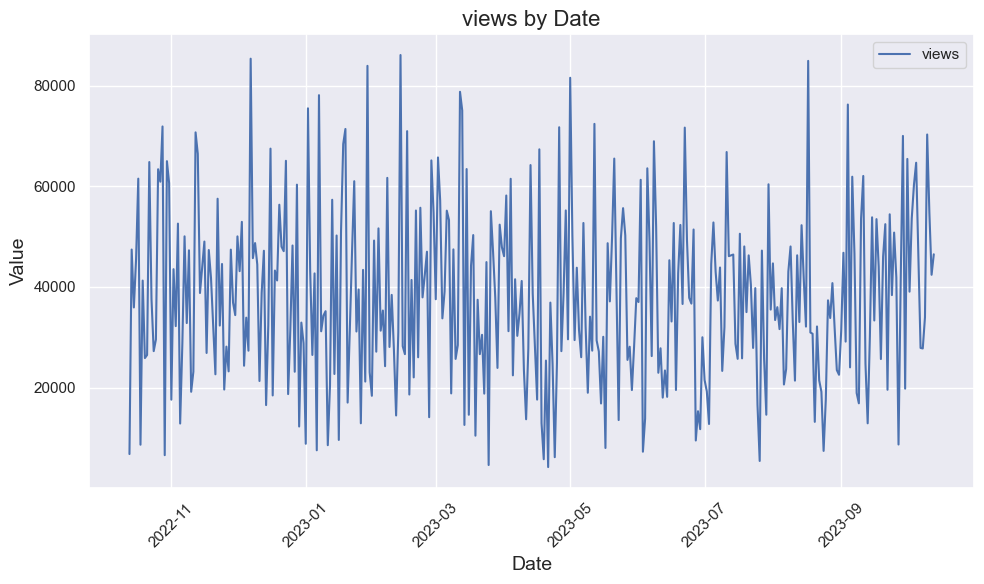

In [28]:
data['date'] = pd.to_datetime(data['date'])

# Group by date and aggregate sum for each column
grouped_data = data.groupby('date')[data.columns[2:]].sum().reset_index()

# Plotting each column separately
plt.figure(figsize=(12, 8))

# Loop through each column (excluding 'date')
for i, column in enumerate(grouped_data.columns[2:]):
    plt.figure(figsize=(10, 6))
    plt.plot(grouped_data['date'], grouped_data[column], label=column)
    plt.title(f'{column} by Date', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Value', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [30]:
data.groupby('platform')[data.columns[3:]].sum().reset_index()

,platform,likes,shares,comments,views
0,Facebook,802109.0,320572.0,194908.0,4379118.0
1,Instagram,878603.0,334011.0,201653.0,4661466.0
2,NonExistingPlatform,6901.0,3095.0,1713.0,40375.0
3,Twitter,868778.0,328671.0,207884.0,4783042.0


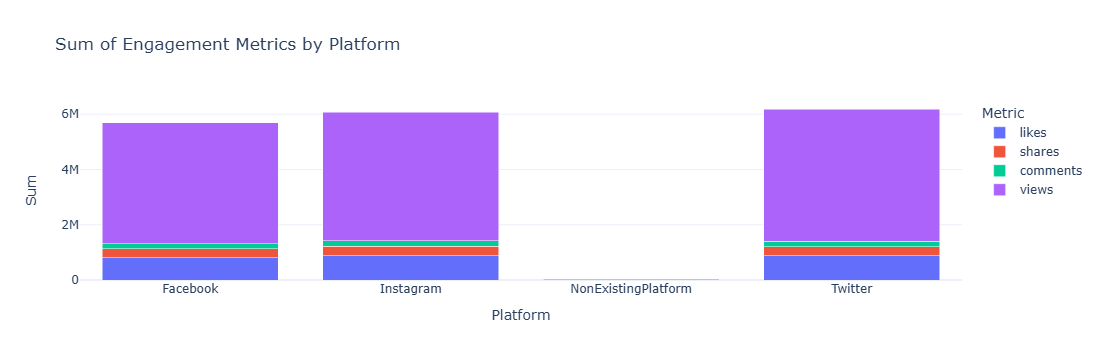

In [32]:
# Columns to plot
columns_to_plot = ['likes', 'shares', 'comments', 'views']

# Group by platform and aggregate sum for each column
grouped_data = data.groupby('platform')[columns_to_plot].sum().reset_index()

# Plot using Plotly Express
fig = plx.bar(grouped_data, x='platform', y=columns_to_plot, 
             title='Sum of Engagement Metrics by Platform',
             labels={'value': 'Sum', 'variable': 'Engagement Metric'},
             barmode='stack')

# Customize the layout
fig.update_layout(xaxis_title='Platform', yaxis_title='Sum', legend_title='Metric', template='plotly_white')

# Show the plot
fig.show()

In [37]:
data.groupby('post_type')[data.columns[3:]].sum().reset_index()

,post_type,likes,shares,comments,views
0,image,926097.0,360992.0,224991.0,5037675.0
1,text,820808.0,316239.0,188520.0,4361595.0
2,video,809486.0,309118.0,192647.0,4464731.0


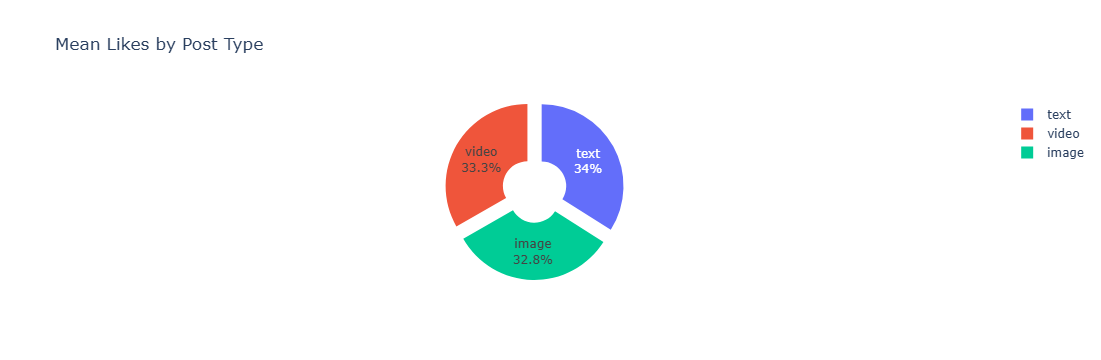

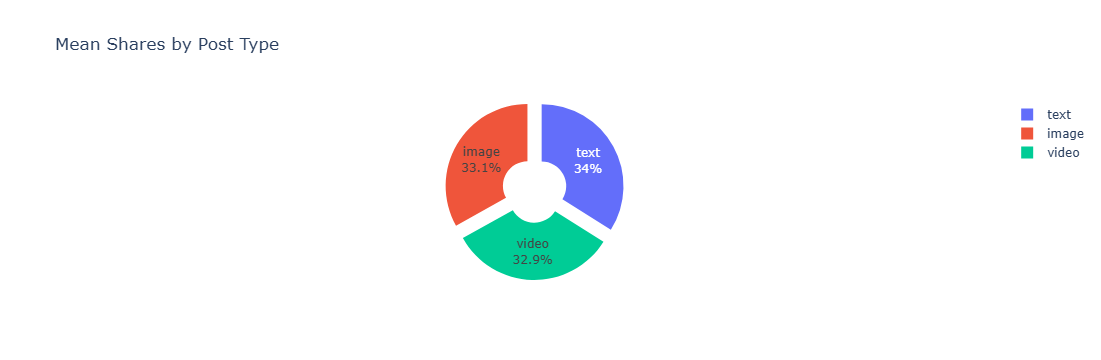

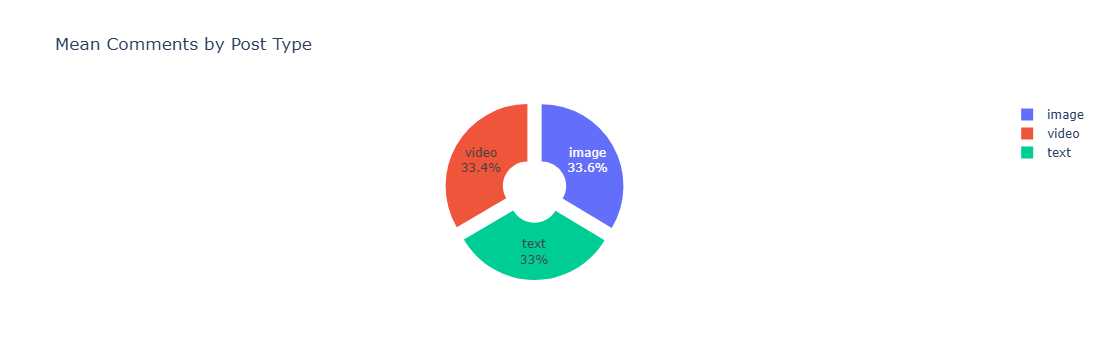

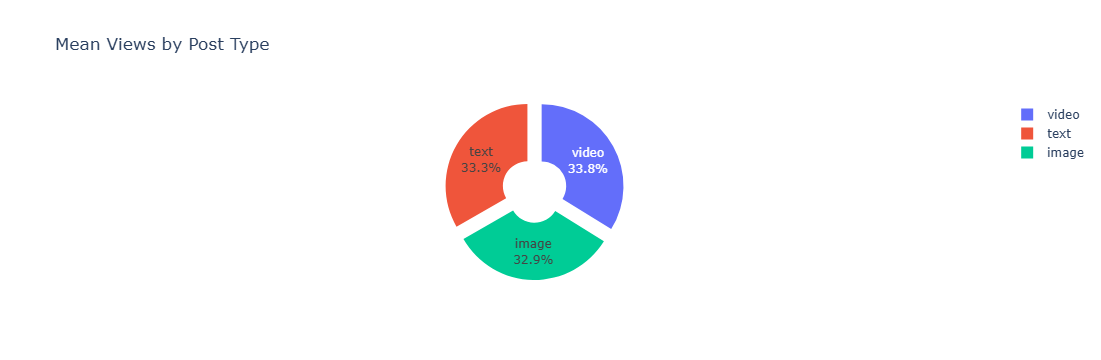

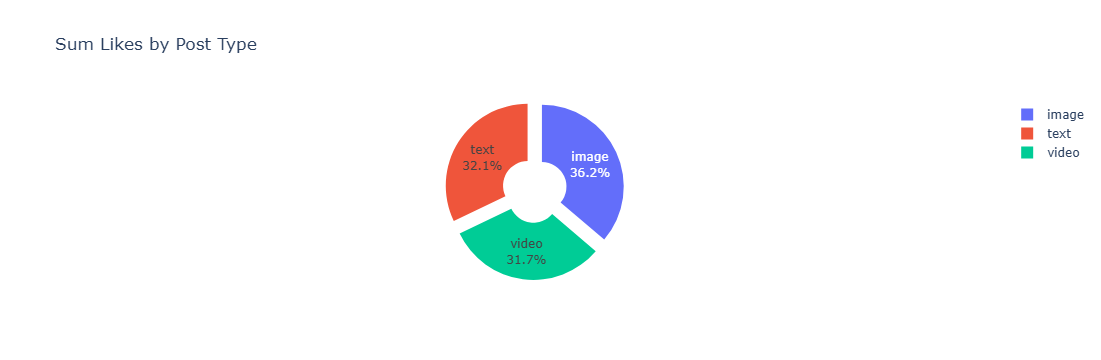

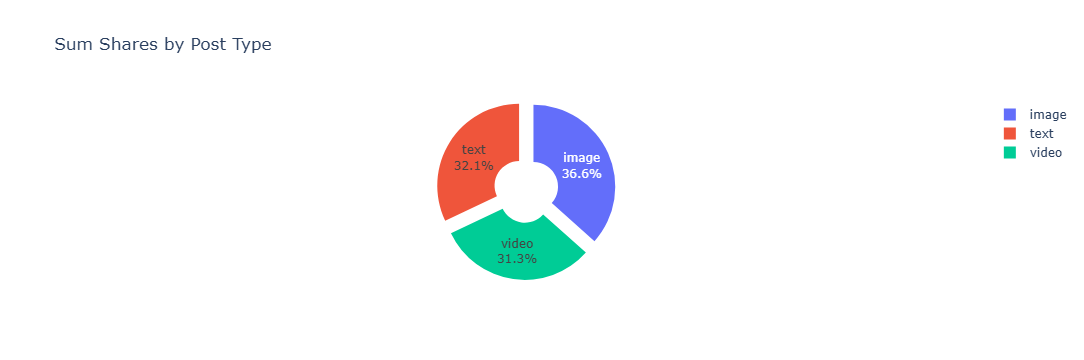

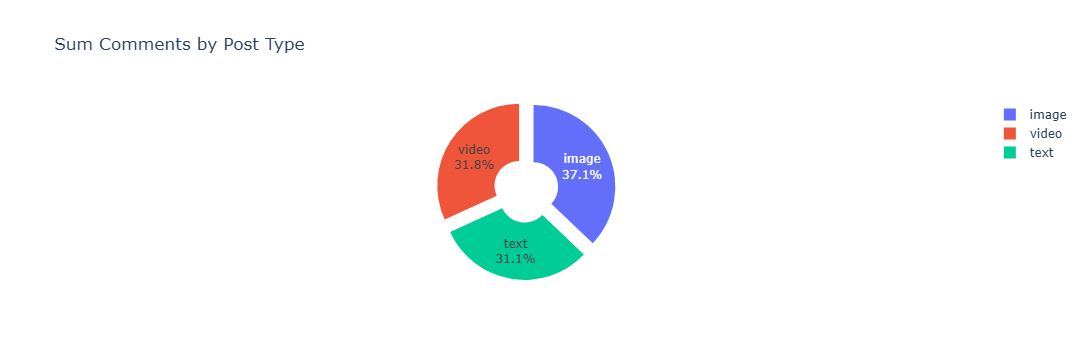

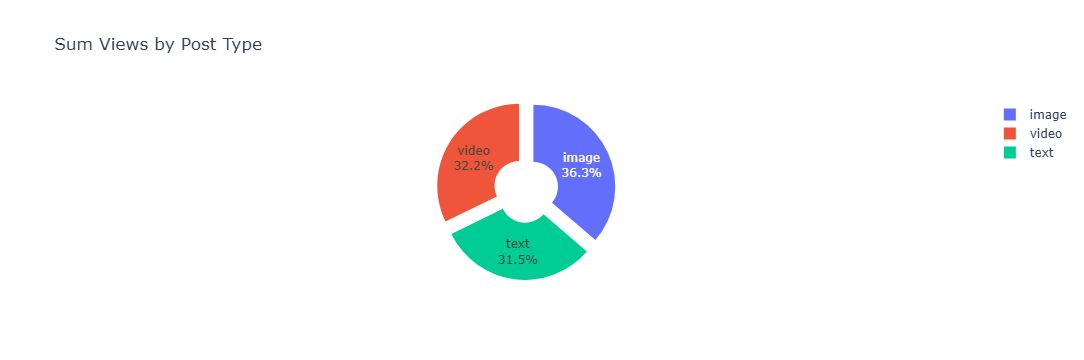

In [42]:
# Initialize an empty list to store figures for mean and sum
figs_mean = []
figs_sum = []

# Create separate pie chart for each engagement metric (mean and sum)
for col in columns_to_plot:
    # Group by post_type and calculate mean for the current column
    grouped_data_mean = data.groupby('post_type')[col].mean().reset_index()

    # Plot using Plotly Express for mean
    fig_mean = plx.pie(grouped_data_mean, values=col, names='post_type',
                      title=f'Mean {col.capitalize()} by Post Type',
                      labels={'value': col.capitalize(), 'post_type': 'Post Type'},
                      hover_data=[col])
    
    # Customize the layout for mean
    fig_mean.update_traces(textinfo='percent+label', pull=[0.1, 0.1, 0.1], hole=0.3)
    
    # Add the figure to the list for mean
    figs_mean.append(fig_mean)
    
    # Group by post_type and calculate sum for the current column
    grouped_data_sum = data.groupby('post_type')[col].sum().reset_index()

    # Plot using Plotly Express for sum
    fig_sum = plx.pie(grouped_data_sum, values=col, names='post_type',
                     title=f'Sum {col.capitalize()} by Post Type',
                     labels={'value': col.capitalize(), 'post_type': 'Post Type'},
                     hover_data=[col])
    
    # Customize the layout for sum
    fig_sum.update_traces(textinfo='percent+label', pull=[0.1, 0.1, 0.1], hole=0.3)
    
    # Add the figure to the list for sum
    figs_sum.append(fig_sum)

# Show the figures for mean
for fig in figs_mean:
    fig.show()

# Show the figures for sum
for fig in figs_sum:
    fig.show()

In [43]:
# Calculate mean engagement metrics by post type
mean_engagement = data.groupby('post_type')[['likes', 'shares', 'comments', 'views']].mean()

# Identify the post type with the highest average engagement
highest_avg_engagement = mean_engagement.mean(axis=1).idxmax()
highest_avg_value = mean_engagement.mean(axis=1).max()

print(f"The post type with the highest average engagement is '{highest_avg_engagement}' with an average value of {highest_avg_value:.2f}.")

The post type with the highest average engagement is 'video' with an average value of 2288.42.


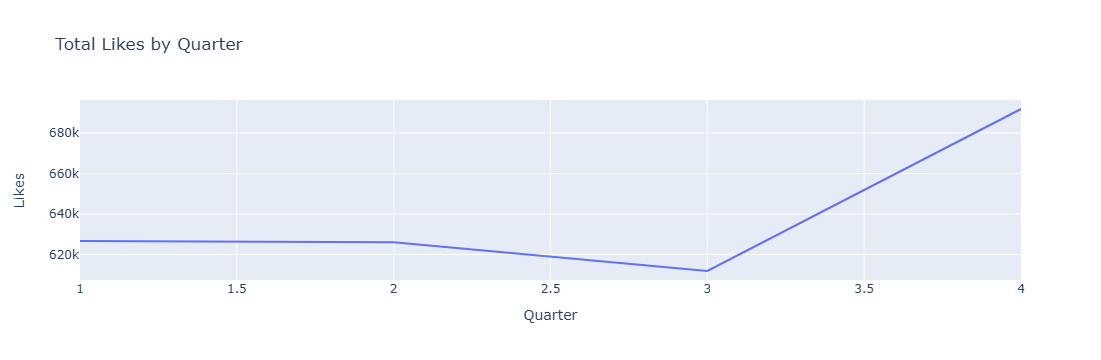

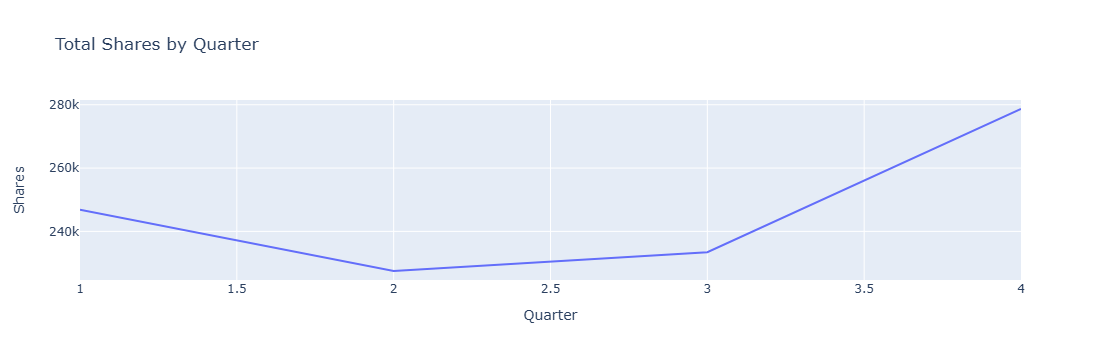

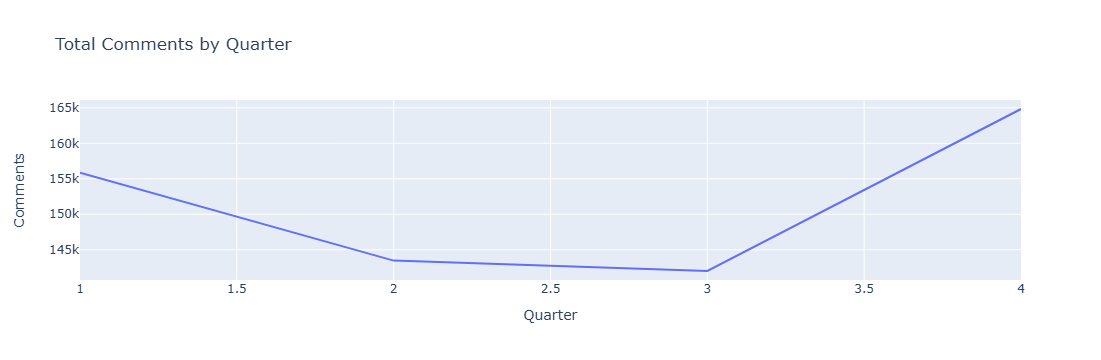

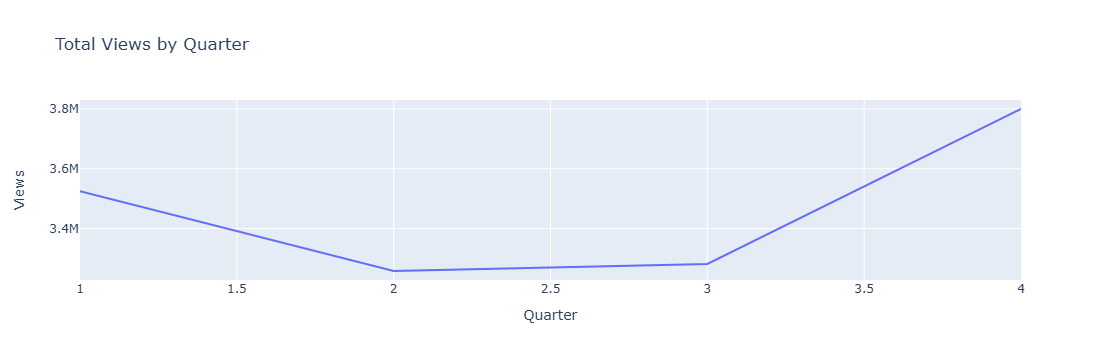

In [45]:
# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Group by quarter and calculate total engagement
data['quarter'] = data['date'].dt.quarter
quarterly_engagement = data.groupby('quarter')[['likes', 'shares', 'comments', 'views']].sum().reset_index()

# Plot using Plotly Express
fig_likes = plx.line(quarterly_engagement, x='quarter', y='likes', title='Total Likes by Quarter', labels={'likes': 'Likes', 'quarter': 'Quarter'})
fig_shares = plx.line(quarterly_engagement, x='quarter', y='shares', title='Total Shares by Quarter', labels={'shares': 'Shares', 'quarter': 'Quarter'})
fig_comments = plx.line(quarterly_engagement, x='quarter', y='comments', title='Total Comments by Quarter', labels={'comments': 'Comments', 'quarter': 'Quarter'})
fig_views = plx.line(quarterly_engagement, x='quarter', y='views', title='Total Views by Quarter', labels={'views': 'Views', 'quarter': 'Quarter'})

# Display the figures
fig_likes.show()
fig_shares.show()
fig_comments.show()
fig_views.show()